In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [118]:
def find_max(data,thrs=0):
    """ 
    Find the local maximums of a curve given in a list
    """
    x = data[:,0]
    y = data[:,1]
    Dy = y[1:]-y[:-1]        # Firs variation
    DDy = Dy[1:] - Dy[:-1]   # Second variation
    xmax = []
    ymax = []
    for i in range(len(Dy)-1):
        if Dy[i]*Dy[i+1] <0:               # Condition of extreme point (indicates a change in 
                                           # sing in the slope of the tangent line)
            if DDy[i] <= 0 and y[i]>=thrs: # Condition of maximum
                xmax.append(x[i])
                ymax.append(y[i])
    return xmax, ymax

def clean(x,y, thrs=0):
    """ 
    Erase the consecutive local maximums that are shorter from a certain threshold 'thrs'
    """
    if thrs==0: thrs=np.mean(x)/3
    xcopy = x.copy()
    ycopy = y.copy()
    erase = []
    c = 0
    for i in range(len(x)-1):
        if x[i+1]-x[i] < thrs: c += 1  # Count number of values to erase
    for i in range(len(x)-c):
        if xcopy[i+1]-xcopy[i] < thrs:
            if ycopy[i+1] < ycopy[i]:  # Determine the higher local maximum
                xcopy.pop(i+1)
                ycopy.pop(i+1)
            else:
                xcopy.pop(i)
                ycopy.pop(i)
                i += -1
    return xcopy, ycopy


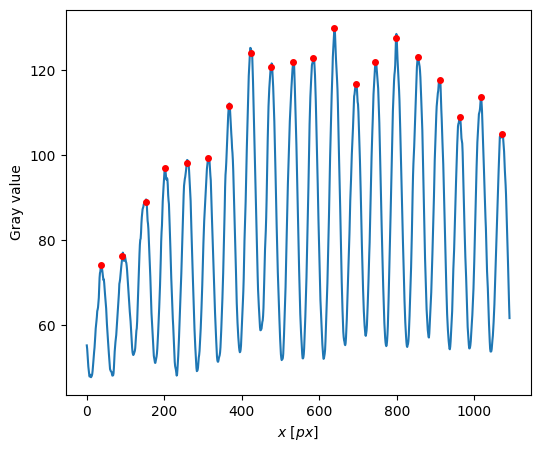

In [149]:
## Im5 - Franjas verticales

data_im5 = np.loadtxt('data_im5.csv',comments='#', delimiter=',')
xmax, ymax = find_max(data_im5,60)
xmax, ymax = clean(xmax,ymax,thrs=10)
xmax.pop(-2)
ymax.pop(-2)
plt.figure(figsize=(6,5))
plt.plot(data_im5[:,0],data_im5[:,1])
plt.plot(xmax,ymax,'or',ms=4)
plt.xlabel(r'$x$ [$px$]')
plt.ylabel('Gray value')
plt.savefig('analysis_im5.png',dpi=270)
plt.show()

In [119]:
for i in range(len(xmax)-1):
    print( xmax[i+1]-xmax[i], '   &',np.round((xmax[i+1]-xmax[i])*5.3,2),'  \\\\')

55.0    & 291.5   \\
60.0    & 318.0   \\
49.0    & 259.7   \\
57.0    & 302.1   \\
56.0    & 296.8   \\
53.0    & 280.9   \\
58.0    & 307.4   \\
51.0    & 270.3   \\
57.0    & 302.1   \\
52.0    & 275.6   \\
54.0    & 286.2   \\
56.0    & 296.8   \\
50.0    & 265.0   \\
53.0    & 280.9   \\
56.0    & 296.8   \\
57.0    & 302.1   \\
51.0    & 270.3   \\
55.0    & 291.5   \\
55.0    & 291.5   \\


In [143]:
xmax = np.array(xmax)
Lambda = np.mean(5.3*(xmax[1:]-xmax[:-1]))
dLambda = np.std(5.3*(xmax[1:]-xmax[:-1]))
lamb = 532
alpha = 2*np.arcsin(lamb/(2*Lambda))
dalpha = lamb/(Lambda**2*np.cos(alpha/2))*dLambda

print('Lambda = ',Lambda)   
print('dLambda = ',dLambda)
print('alpha = ',alpha)
print('dalpha = ',dalpha)

Lambda =  288.7105263157895
dLambda =  15.125019173083697
alpha =  2.3430168939720657
dalpha =  0.24831224965160809


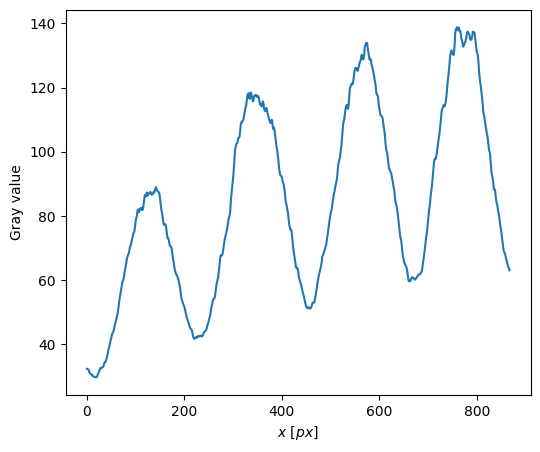

In [148]:
## Im 4 Franjas horizontales
data_im4 = np.loadtxt('data_im4.csv',comments='#', delimiter=',')

plt.figure(figsize=(6,5))
plt.plot(data_im4[:,0],data_im4[:,1])
#plt.plot(xmax,ymax,'or',ms=4)
plt.xlabel(r'$x$ [$px$]')
plt.ylabel('Gray value')
#plt.savefig('analysis_im4.png',dpi=270)
plt.show()

In [295]:
from scipy.optimize import curve_fit

def gaussian(x,a,b,c):
    return np.exp(-(x-b)**2/a)+c

def parabola(x,a,b,c):
    return a*x**2 + b*x + c

## Pico 1
xsec1 = data_im4[70:180,0]
ysec1 = data_im4[70:180,1]

params1, var = curve_fit(parabola,xsec1,ysec1)
cov = np.sqrt(np.diag(var))
t1 = np.linspace(70,180,200)
pico1 = -params1[1]/(2*params1[0])
print('Pico = ',pico1)

Pico =  129.973358292316


In [291]:
## Pico 2
xsec2 = data_im4[260:440,0]
ysec2 = data_im4[260:440,1]

params2, var = curve_fit(parabola,xsec2,ysec2)
cov = np.sqrt(np.diag(var))
t2 = np.linspace(260,440,200)
pico2 = -params2[1]/(2*params2[0])
print('Pico = ',pico2)

Pico =  350.63896656963203


In [292]:
## Pico 3
xsec3 = data_im4[500:640,0]
ysec3 = data_im4[500:640,1]

params3, var = curve_fit(parabola,xsec3,ysec3)
cov = np.sqrt(np.diag(var))
t3 = np.linspace(500,640,200)
pico3 = -params3[1]/(2*params3[0])
print('Pico = ',pico3)

Pico =  568.4703013616738


In [293]:
## Pico 4
xsec4 = data_im4[690:860,0]
ysec4 = data_im4[690:860,1]

params4, var = curve_fit(parabola,xsec4,ysec4)
cov = np.sqrt(np.diag(var))
t4 = np.linspace(690,860,200)
pico4 = -params4[1]/(2*params4[0])
print('Pico = ',pico4)

Pico =  772.9732573960727


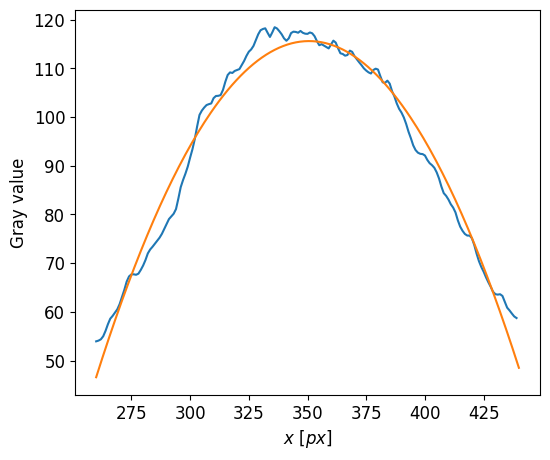

In [289]:
plt.figure(figsize=(6,5))
plt.plot(xsec2,ysec2)
plt.plot(t2,parabola(t2,*params2))
plt.xlabel(r'$x$ [$px$]',fontsize=12)
plt.ylabel('Gray value',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('parabola_fit.png',dpi=220)
plt.show()

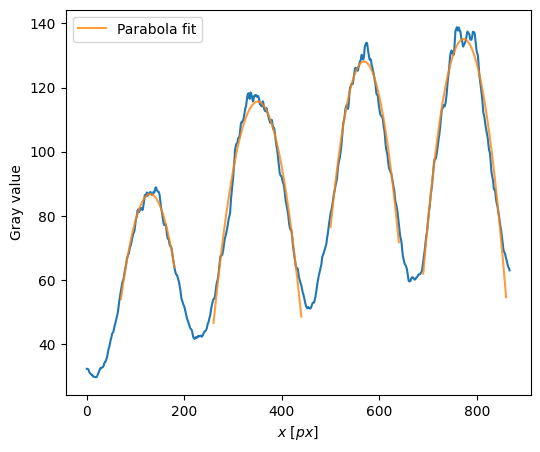

In [290]:


plt.figure(figsize=(6,5))
plt.plot(data_im4[:,0],data_im4[:,1])
plt.plot(t1,parabola(t1,*params1),color='#FF830F',label='Parabola fit',alpha=0.8)
plt.plot(t2,parabola(t2,*params2),color='#FF830F',alpha=0.8)
plt.plot(t3,parabola(t3,*params3),color='#FF830F',alpha=0.8)
plt.plot(t4,parabola(t4,*params4),color='#FF830F',alpha=0.8)
plt.xlabel(r'$x$ [$px$]')
plt.legend(fontsize=10,loc='upper left')
plt.ylabel('Gray value')
#plt.savefig('analysis_im4.png',dpi=270)
plt.show()

In [300]:
x = [pico1,pico2,pico3,pico4]
for i in range(len(x)-1):
    print(np.round(x[i+1]-x[i],0), '   &',np.round((x[i+1]-x[i])*5.3,2),'  \\\\')

221.0    & 1169.53   \\
218.0    & 1154.51   \\
205.0    & 1083.87   \\


In [301]:
x = np.array(x)
Lambda = np.mean(5.3*(x[1:]-x[:-1]))
dLambda = np.std(5.3*(x[1:]-x[:-1]))
lamb = 532
alpha = 2*np.arcsin(lamb/(2*Lambda))
dalpha = lamb/(Lambda**2*np.cos(alpha/2))*dLambda

print('Lambda = ',Lambda)   
print('dLambda = ',dLambda)
print('alpha = ',alpha)
print('dalpha = ',dalpha)

Lambda =  1135.9664884166368
dLambda =  37.347772658379206
alpha =  0.47271269282002837
dalpha =  0.015837649993281796


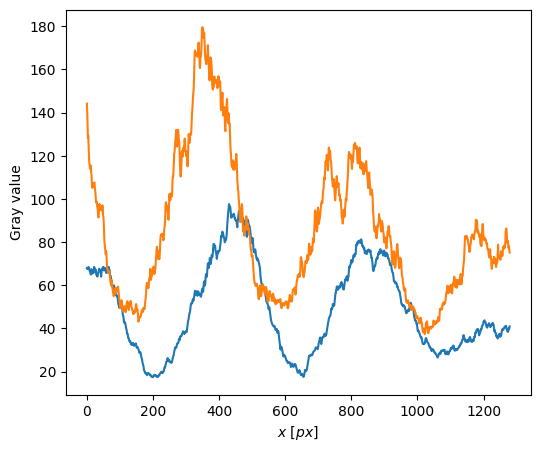

In [317]:
## Im17 - Lamina de vidrio
data_im17_up = np.loadtxt('data_im17_up.csv',comments='#', delimiter=',')
data_im17_d = np.loadtxt('data_im17_down.csv',comments='#', delimiter=',')

plt.figure(figsize=(6,5))
plt.plot(data_im17_up[:,0],data_im17_up[:,1])
plt.plot(data_im17_d[:,0],data_im17_d[:,1])
plt.xlabel(r'$x$ [$px$]')
plt.ylabel('Gray value')
#plt.savefig('analysis_im4.png',dpi=270)
plt.show()

In [520]:
## Parte superior Pico #1
# Data
w = 15                             # Window of moving average
xsec = data_im17_up[350:550-w,0]
ysec = data_im17_up[350:550,1]

# Moving average
ynew = []
for i in range(len(ysec)-w):
    ynew.append(np.mean(ysec[i:i+w])) # Moving average
t = np.linspace(350,550-w,200)

# Fit
params, var = curve_fit(parabola,xsec,ynew)
cov = np.sqrt(np.diag(var))
pico1_up = -params[1]/(2*params[0])
print('Pico = ',pico1_up)

Pico =  439.9785683456363


In [552]:
## Parte superior Pico #1
# Data
w = 10                              # Window of moving average
xsec = data_im17_up[700:1030-w,0]
ysec = data_im17_up[700:1030,1]

# Moving average
ynew = []
for i in range(len(ysec)-w):
    ynew.append(np.mean(ysec[i:i+w]))   # moving average
t = np.linspace(700,1030-w,200)

# Fit
params, var = curve_fit(parabola,xsec,ynew)
cov = np.sqrt(np.diag(var))
pico2_up = -params[1]/(2*params[0])
print('Pico = ',pico2_up)

Pico =  854.568480386331


In [496]:
## Parte inferior Pico #1
# Data
w = 20                              # Window of moving average
xsec = data_im17_d[200:520-w,0]
ysec = data_im17_d[200:520,1]

# Moving average
ynew = []
for i in range(len(ysec)-w):
    ynew.append(np.mean(ysec[i:i+w])) # Moving average
t = np.linspace(200,520-w,200)

# Fit
params, var = curve_fit(parabola,xsec,ynew)
cov = np.sqrt(np.diag(var))
pico1_d = -params[1]/(2*params[0])
print('Pico = ',pico1_d)

Pico =  348.7795163766055


In [470]:
## Parte inferior Pico #2
# Data
w = 20                             # Window of moving average
xsec = data_im17_d[600:1000-w,0]
ysec = data_im17_d[600:1000,1]

# Moving average
ynew = []
for i in range(len(ysec)-w):
    ynew.append(np.mean(ysec[i:i+w])) # Moving average
t = np.linspace(600,1000-w,200)

# Fit
params, var = curve_fit(parabola,xsec,ynew)
cov = np.sqrt(np.diag(var))
pico2_d = -params[1]/(2*params[0])
print('Pico = ',pico2_d)

Pico =  785.9587657968049


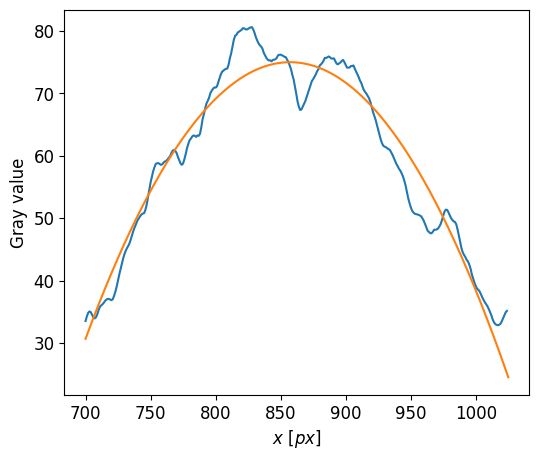

In [547]:
plt.figure(figsize=(6,5))
plt.plot(xsec,ynew)
plt.plot(t,parabola(t,*params))
plt.xlabel(r'$x$ [$px$]',fontsize=12)
plt.ylabel('Gray value',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig('parabola_fit_im17.png',dpi=220)
plt.show()

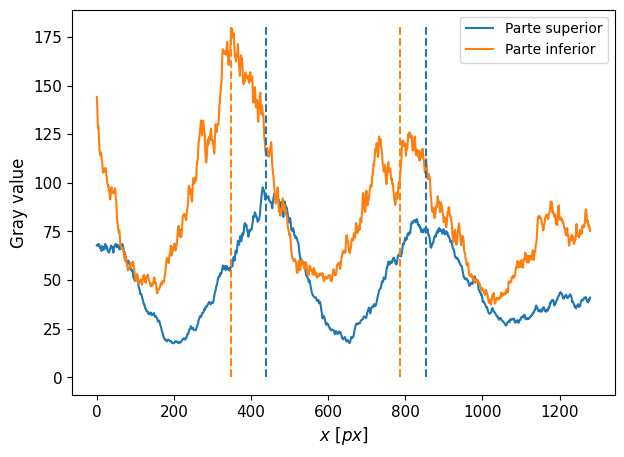

In [557]:
## Im17 - Lamina de vidrio
data_im17_up = np.loadtxt('data_im17_up.csv',comments='#', delimiter=',')
data_im17_d = np.loadtxt('data_im17_down.csv',comments='#', delimiter=',')

plt.figure(figsize=(7,5))
plt.plot(data_im17_up[:,0],data_im17_up[:,1],label='Parte superior')
plt.plot(data_im17_d[:,0],data_im17_d[:,1],label='Parte inferior')
plt.xlabel(r'$x$ [$px$]',fontsize=12)
plt.ylabel('Gray value',fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend()
plt.vlines([pico1_up,pico2_up],[0]*2,[180]*2,linestyles='--')
plt.vlines([pico1_d,pico2_d],[0]*2,[180]*2,colors='#FF830F',linestyles='--')
plt.savefig('analysis_im17.png',dpi=270)
plt.show()

In [576]:
x = np.array([pico1_up-pico1_d,pico2_up-pico2_d])  # Desplazamiento en [px]
DLambda = x*5.3                   # Desplazamiento en [um]
DLambda_m = np.mean(DLambda)      # Desplazamiento medio
DLambda_std = np.std(DLambda)     # Desviación estándar desplazamiento medio
lamb = 532
Lambda = (pico2_d-pico1_d)*5.3
n = 1.551
d = 1.20
e = d + lamb*10**(-6) / (2*(n-1)) * (DLambda_m)/Lambda 
m = 2*(n-1)*d / (lamb*10**(-6))
#e = lamb*10**(-6) / (2*(n-1)) * ( int(m) + (Lambda-DLambda_m)/Lambda)

de = 0.05 + lamb*10**(-6) / (2*(n-1))*( DLambda_std/Lambda + DLambda_m/Lambda**2*5.3 )

print('DLambda_m = ',DLambda_m)
print('DLambda_std = ',DLambda_std)
print('Lambda = ',Lambda)
print('e = ',e)
print('de = ',de)
print('m = ',m)
print('Delta Lambda / Lambda = ',DLambda_m/Lambda)


DLambda_m =  423.49323138017576
DLambda_std =  59.86174405568741
Lambda =  2317.0500219270566
e =  1.2000882350429718
de =  0.050012674054699835
m =  2485.7142857142853
Delta Lambda / Lambda =  0.18277258901297377


## **Apendice**

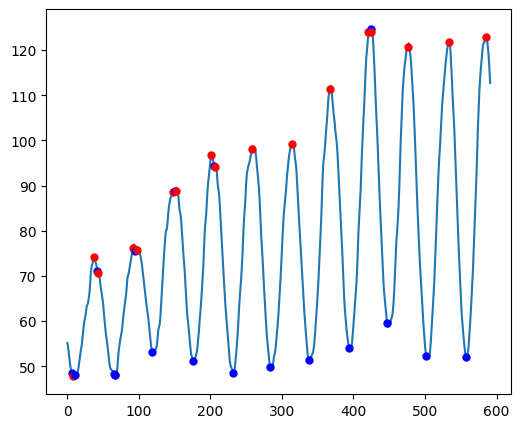

In [49]:
## Hallar los extremos de una curva dada en una lista
data_im5 = np.loadtxt('data_im5.csv',comments='#', delimiter=',')
x = data_im5[:-500,0]
y = data_im5[:-500,1]
Dy = y[1:] - y[:-1]
DDy = Dy[1:] - Dy[:-1]
plt.figure(figsize=(6,5))
plt.plot(data_im5[:-500,0],data_im5[:-500,1])
for i in range(len(Dy)-2):
    if Dy[i]*Dy[i+1] <0:
        if DDy[i] >0:
            plt.plot(x[i],y[i],'ob',ms=5)
        else:
            plt.plot(x[i],y[i],'or',ms=5)